This notebook generates the network diagram using networkX

In [170]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Import Network Diagram

In [171]:
directory = '../data/'

In [172]:
network_df = pd.read_csv(directory+'Network_tweets.csv')
network_df.columns = ['user1', 'user2', 'date', 'type']

In [304]:
network_df

,user1,user2,date,type
0,givepeazachance,givepeazachance,2021-09-19,Tweet
1,JacobMcCourt,JacobMcCourt,2021-09-19,Tweet
2,ShaneWenzel,ShaneWenzel,2021-09-19,Tweet
3,AnthonyNCentre,JustinTrudeau,2021-09-19,Retweet
4,NunoMAguiar,erinotoole,2021-09-19,Retweet
...,...,...,...,...
22283,rootcauseteam,JustinTrudeau,2021-08-21,Retweet
22284,Hodlthedoors,cbcnewsbc,2021-08-21,Retweet
22285,Hodlthedoors,CBCVancouver,2021-08-21,Retweet
22286,Hodlthedoors,TheTyee,2021-08-21,Retweet


### Generate Graph

In [176]:
def gen_graph(network_df):
    rt_in = network_df.type=='Retweet'
    rts = network_df[rt_in]
    tweets = network_df.drop(index= rts.index)
    graph = nx.DiGraph()
    graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
    graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')
    return graph

In [177]:
graph = gen_graph(network_df)

### Draw Simple Graph

In [195]:
plot_dir = '../plots/'

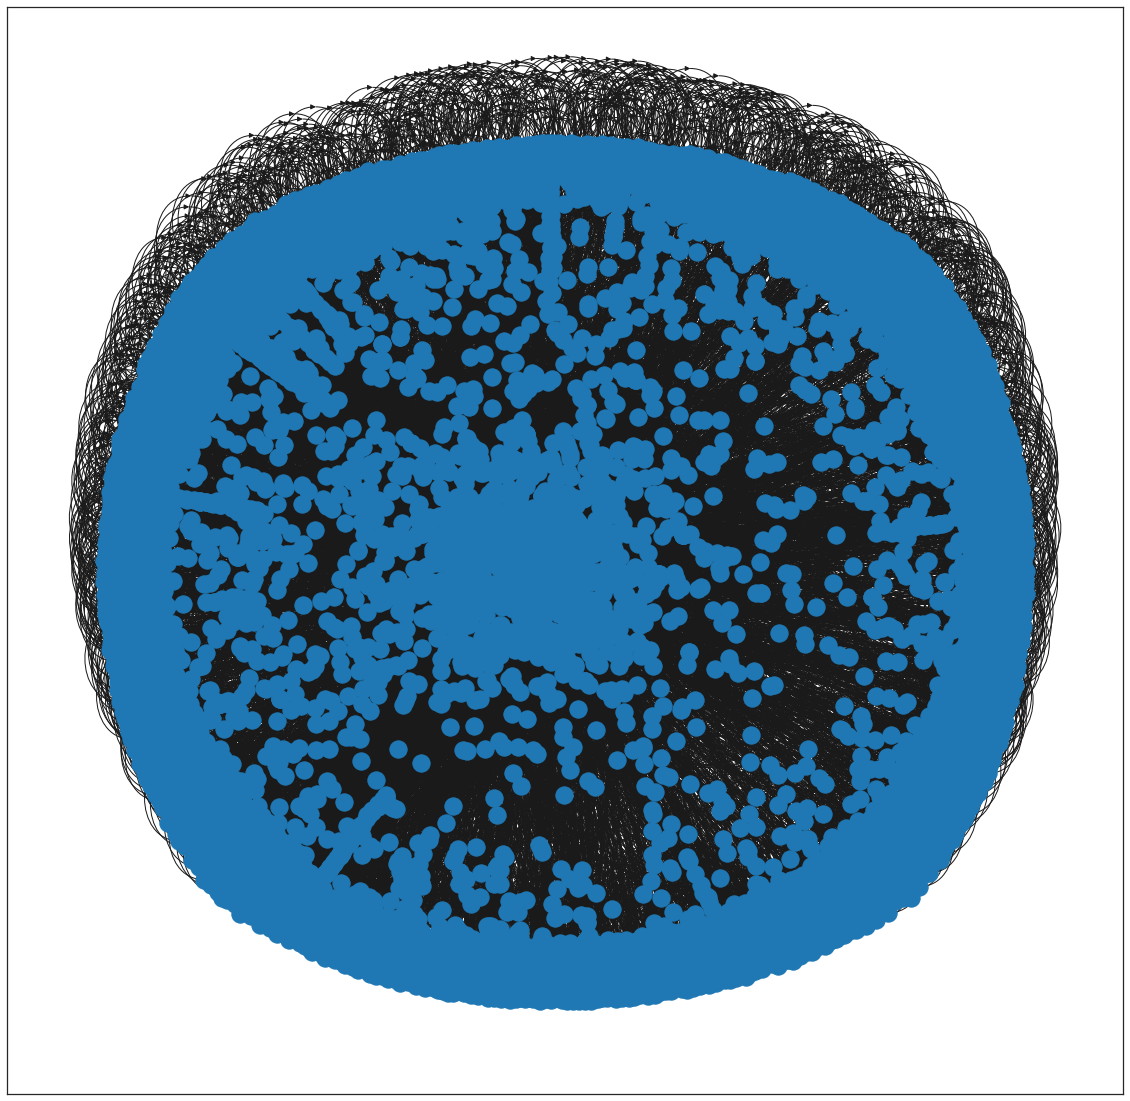

In [198]:
sns.set_style("white")
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.savefig(plot_dir+'network.png')
plt.show()

### Node Network Features

In [199]:
def network_feat(graph):
    df = {
        'in-degree_centrality': pd.Series(nx.algorithms.centrality.in_degree_centrality(graph)),
        'out-degree_centrality': pd.Series(nx.algorithms.centrality.out_degree_centrality(graph)),
        'betweeness_centrality': pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)),
        'eigenvector_centrality': pd.Series(nx.algorithms.centrality.eigenvector_centrality(graph)),
        'closeness': pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph.reverse())),
        'pagerank': pd.Series(nx.pagerank(graph, alpha=0.8))
    }
    
    return pd.concat(df, axis=1)

In [200]:
overall_feats = network_feat(graph)

In [201]:
overall_feats

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness,pagerank
AnthonyNCentre,0.000129,0.000388,0.0,9.746679e-11,0.000258,0.000074
JustinTrudeau,0.070570,0.000000,0.0,2.875920e-01,0.000000,0.008086
NunoMAguiar,0.000000,0.000388,0.0,2.770173e-24,0.000388,0.000054
erinotoole,0.066563,0.000000,0.0,2.356058e-01,0.000000,0.007096
paolam1973,0.000000,0.000905,0.0,2.770173e-24,0.000919,0.000054
...,...,...,...,...,...,...
CWCArtandSoul,0.000129,0.000129,0.0,9.746679e-11,0.000000,0.000262
stepanouk,0.000129,0.000129,0.0,9.746679e-11,0.000000,0.000262
hannahmacl,0.000129,0.000129,0.0,9.746679e-11,0.000000,0.000262
Hibo4Strathcona,0.000129,0.000129,0.0,9.746679e-11,0.000000,0.000262


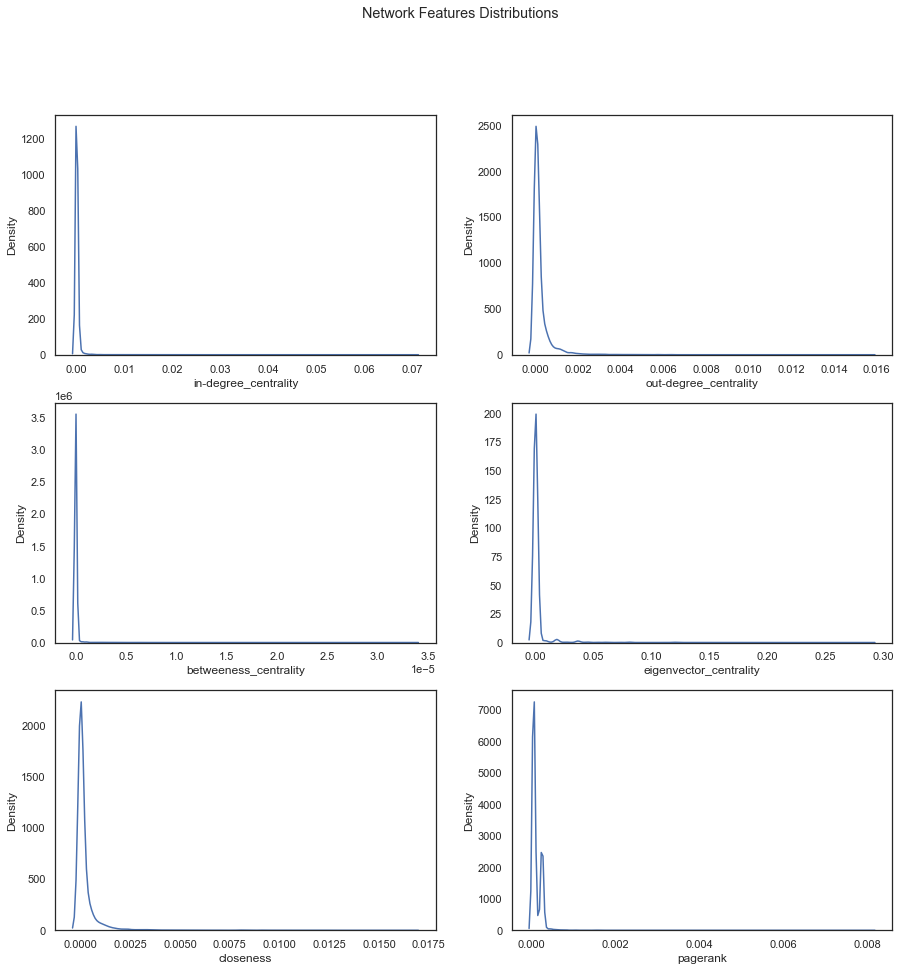

In [214]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
 
fig.suptitle('Network Features Distributions')

sns.kdeplot(ax=axes[0, 0], data=overall_feats, x='in-degree_centrality')
sns.kdeplot(ax=axes[0, 1], data=overall_feats, x='out-degree_centrality')
sns.kdeplot(ax=axes[1, 0], data=overall_feats, x='betweeness_centrality')
sns.kdeplot(ax=axes[1, 1], data=overall_feats, x='eigenvector_centrality')
sns.kdeplot(ax=axes[2, 0], data=overall_feats, x='closeness')
sns.kdeplot(ax=axes[2, 1], data=overall_feats, x='pagerank')

plt.savefig(plot_dir+'metric_dist.png')

In [183]:
election_results = {
    'JustinTrudeau': 0.33,
    'erinotoole': 0.34,
    'yfblanchet': 0.08,
    'theJagmeetSingh': 0.18,
    'AnnamiePaul': 0.02,
    'MaximeBernier': 0.05
}

election_results = pd.Series(election_results, name='election_results')

In [184]:
results_df = pd.concat([overall_feats.loc[election_results.index], election_results], axis=1)
results_df

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness,pagerank,election_results
JustinTrudeau,0.070570,0.000000,0.000000e+00,2.875920e-01,0.000000,0.008086,0.33
erinotoole,0.066563,0.000000,0.000000e+00,2.356058e-01,0.000000,0.007096,0.34
yfblanchet,0.004911,0.000000,0.000000e+00,3.167671e-09,0.000000,0.000298,0.08
theJagmeetSingh,0.038258,0.000000,0.000000e+00,2.701030e-01,0.000000,0.004083,0.18
AnnamiePaul,0.006721,0.000258,7.852515e-07,2.002717e-06,0.000129,0.001015,0.02
MaximeBernier,0.010081,0.000000,0.000000e+00,4.173333e-06,0.000000,0.001505,0.05


In [241]:
elect_corr = results_df.corr()['election_results']
elect_corr.to_csv(directory+"pop_vote_corr.csv")
elect_corr

in-degree_centrality      0.983976
out-degree_centrality    -0.509258
betweeness_centrality    -0.509258
eigenvector_centrality    0.888757
closeness                -0.509258
pagerank                  0.967990
election_results          1.000000
Name: election_results, dtype: float64

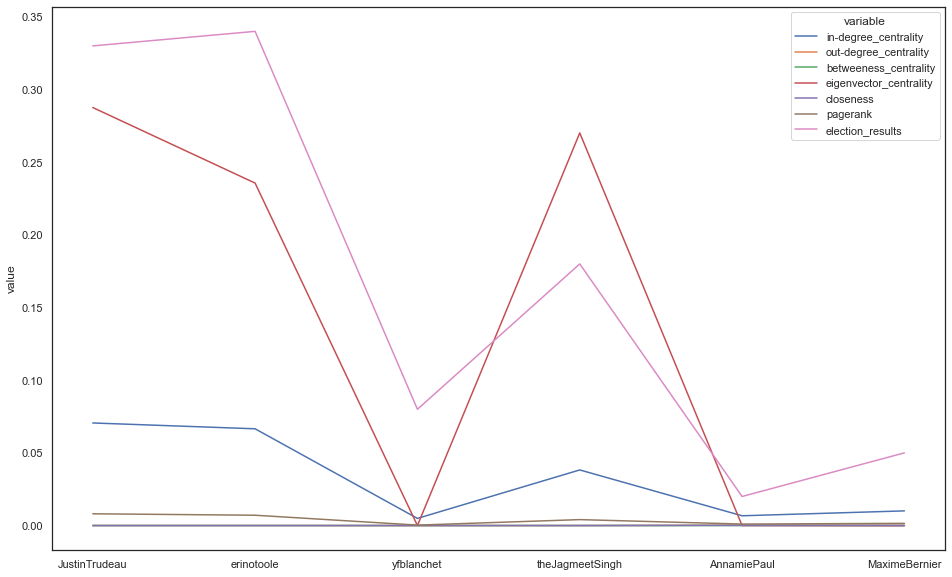

In [230]:
plot_data = results_df.melt(ignore_index = False)
sns.set(rc={"figure.figsize":(16, 10)})
sns.set_style("white")
sns.lineplot(x = plot_data.index, y = plot_data.value, hue = plot_data.variable)
plt.savefig(plot_dir+'corr_plot.png')

In [255]:
def network_feat_v2(graph):
    df = {
        'indegree_centrality': pd.Series(nx.algorithms.centrality.in_degree_centrality(graph)),
        'eigenvector_centrality': pd.Series(nx.algorithms.centrality.eigenvector_centrality(graph, max_iter=10000)),
        'pagerank': pd.Series(nx.pagerank(graph, alpha=0.8))
    }
    
    return pd.concat(df, axis=1)

In [292]:
network_df['date'] = pd.to_datetime(network_df['date']).dt.date
dates = network_df.date.unique()
trends = pd.DataFrame()
for day in dates:
    df = network_df[network_df.date==day]
    graph = gen_graph(df)
    metrics = network_feat_v2(graph)
    metrics['date'] = day
    trends = pd.concat([trends, metrics])

In [293]:
trends = trends.loc[election_results.index]
trends.index = [trends.index, trends.date]
trends.drop(inplace = True, columns = ['date'])
#trends = trends.melt(ignore_index = False)
trends.reset_index(inplace=True)
trends

,level_0,date,indegree_centrality,eigenvector_centrality,pagerank
0,JustinTrudeau,2021-09-19,0.043478,7.181916e-03,0.007864
1,JustinTrudeau,2021-09-18,0.044326,7.018114e-04,0.007153
2,JustinTrudeau,2021-09-17,0.032357,2.908095e-01,0.005097
3,JustinTrudeau,2021-09-16,0.039187,6.677781e-03,0.006294
4,JustinTrudeau,2021-09-15,0.026738,2.605903e-03,0.004689
...,...,...,...,...,...
154,MaximeBernier,2021-08-25,0.003610,1.135603e-06,0.001324
155,MaximeBernier,2021-08-24,0.007339,2.167794e-311,0.001620
156,MaximeBernier,2021-08-23,0.003150,1.267856e-03,0.001310
157,MaximeBernier,2021-08-22,0.005217,3.123943e-199,0.001732


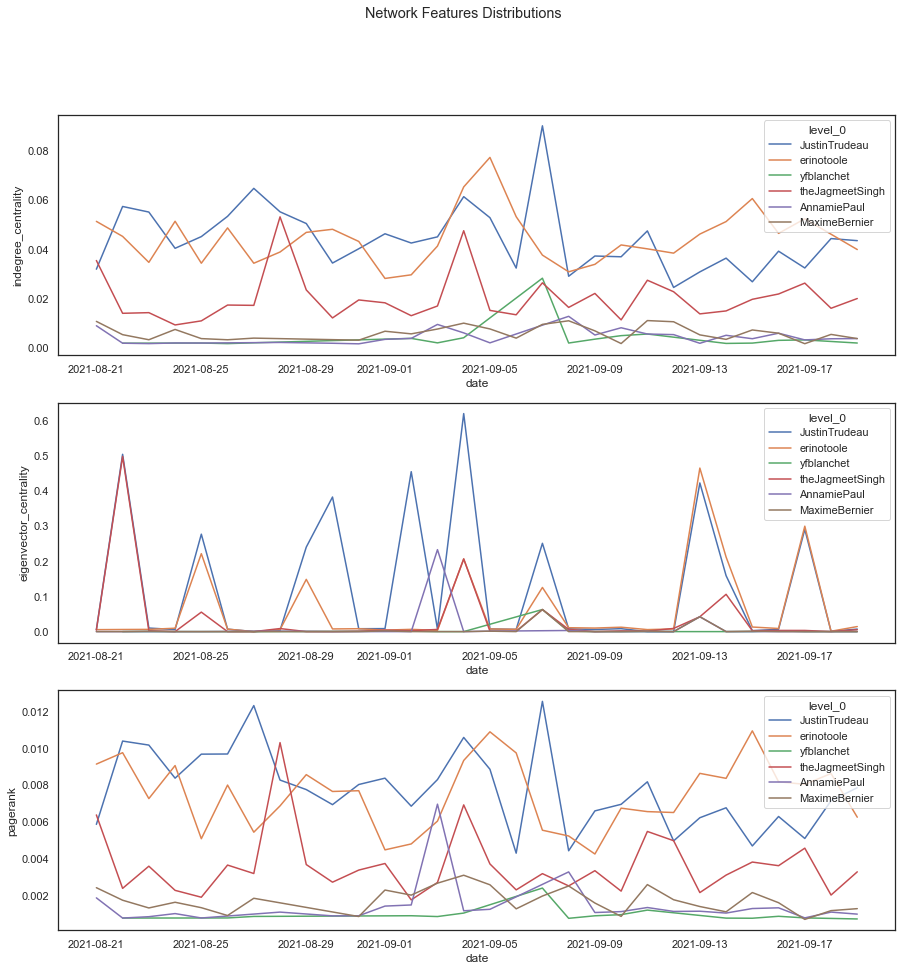

In [297]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
 
fig.suptitle('Network Features Distributions')

sns.lineplot(ax=axes[0], data=trends, x='date', y='indegree_centrality', hue='level_0')
sns.lineplot(ax=axes[1], data=trends, x='date', y='eigenvector_centrality', hue='level_0')
sns.lineplot(ax=axes[2], data=trends, x='date', y='pagerank', hue='level_0')

plt.savefig(plot_dir+'metric_trends.png')

In [298]:
overall_feats.nlargest(10, 'betweeness_centrality')['betweeness_centrality']

Swift01_2000      0.000034
l_stone           0.000021
LoranHayden       0.000020
TheAgenda         0.000014
brianlilley       0.000011
LPCLitterBox      0.000008
kamorant          0.000008
nehoez            0.000008
sunlorrie         0.000007
kathleen_petty    0.000006
Name: betweeness_centrality, dtype: float64

In [299]:
overall_feats.nlargest(10, 'out-degree_centrality')['out-degree_centrality']

FriendsOScience    0.015639
wengcouver         0.014217
Swift01_2000       0.013571
TheAgenda          0.012537
Mark3Ds            0.012537
nehoez             0.007496
ratnaomi           0.006850
PatBruc            0.006333
HardCelt           0.006333
anagin40           0.006204
Name: out-degree_centrality, dtype: float64

In [300]:
overall_feats.nlargest(10, 'eigenvector_centrality')['eigenvector_centrality']

JustinTrudeau      0.287592
theJagmeetSingh    0.270103
kathleenmonk       0.241563
zainvelji          0.241563
erinotoole         0.235606
EvanLSolomon       0.187719
jkenney            0.169430
l_stone            0.161938
CTV_PowerPlay      0.161187
CPC_HQ             0.155102
Name: eigenvector_centrality, dtype: float64

In [301]:
overall_feats.nlargest(10, 'closeness') ['closeness']

FriendsOScience    0.016579
Swift01_2000       0.016575
wengcouver         0.014589
nehoez             0.014179
Mark3Ds            0.012482
LoranHayden        0.012117
TheAgenda          0.011449
kamorant           0.010787
anagin40           0.010375
GeraldKutney       0.010200
Name: closeness, dtype: float64

In [302]:
overall_feats.nlargest(10, 'pagerank') ['pagerank']

JustinTrudeau      0.008086
erinotoole         0.007096
CanadianGreens     0.005596
CPC_HQ             0.004672
theJagmeetSingh    0.004083
liberal_party      0.003431
NDP                0.002923
globalnews         0.002440
jkenney            0.002131
MarkGerretsen      0.002038
Name: pagerank, dtype: float64

In [303]:
overall_feats.nlargest(10, 'in-degree_centrality') ['in-degree_centrality']

JustinTrudeau      0.070570
erinotoole         0.066563
CPC_HQ             0.044979
theJagmeetSingh    0.038258
liberal_party      0.037224
NDP                0.028693
jkenney            0.016802
CBCNews            0.011762
CTVNews            0.010211
MaximeBernier      0.010081
Name: in-degree_centrality, dtype: float64

In [307]:
pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph)).nlargest(10)

erinotoole         0.051327
theJagmeetSingh    0.035398
liberal_party      0.033713
CPC_HQ             0.031858
JustinTrudeau      0.031858
NDP                0.017699
MaximeBernier      0.010619
PierrePoilievre    0.010619
AnnamiePaul        0.008850
jkenney            0.008850
dtype: float64